# Benchmark PySpark vs PyThoth

## Generating Dataset

In [ ]:
import random

small_list = [random.randint(1, 100) for _ in range(50)]
medium_list = [random.randint(1, 100) for _ in range(5_000)]
large_list = [random.randint(1, 100) for _ in range(500_000)]
extra_large_list = [random.randint(1, 100) for _ in range(5_000_000)]
print("Generating double extra large list...")
double_extra_large_list = [random.randint(1, 100) for _ in range(10_000_000)]
print("Finished generating double extra large list.")

# PySpark Benchmark

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
import time

In [2]:
#192.168.122.217    spark-master

MASTER_IP = "spark-master"


In [ ]:

spark = (
    SparkSession.builder.appName("Thoth Benchmark")
    .master(f"spark://{MASTER_IP}:7077")
    # .config("spark.executor.memory", "1g")
    # .config("spark.driver.memory", "1g")
    .getOrCreate()
)

#### Average Calculations

In [ ]:
# Create DataFrames, this step takes a lot of time
small_df = spark.createDataFrame(small_list, "int").toDF("value")
medium_df = spark.createDataFrame(medium_list, "int").toDF("value")
large_df = spark.createDataFrame(large_list, "int").toDF("value")
extra_large_list_df = spark.createDataFrame(extra_large_list, "int").toDF("value")
double_extra_large_list_df = spark.createDataFrame(double_extra_large_list, "int").toDF("value")

In [38]:
def spark_avg(df, label):
    start_time = time.time()
    df.agg(avg("value")).show()
    end_time = time.time()
    elapsed = end_time - start_time
    print(f"\nSpark Time taken to process {label} DataFrame: {elapsed} seconds")
    return elapsed




In [ ]:
py_spark_avg_small_list_time = spark_avg(small_df, "small")
py_spark_avg_medium_list_time = spark_avg(medium_df, "medium")
py_spark_avg_large_list_time = spark_avg(large_df, "large")
py_spark_avg_extra_large_list_time = spark_avg(extra_large_list_df, "extra large")
py_spark_avg_double_extra_large_list_time = spark_avg(double_extra_large_list_df, "double extra large")

### Min Max Calculations

In [39]:
from pyspark.sql.functions import min as spark_min, max as spark_max
def spark_min_max(df, label):
    # Min timing
    start_time = time.time()
    min_value = df.agg(spark_min("value").alias("min")).collect()[0]['min']
    end_time = time.time()
    min_time = end_time - start_time
    print(f"{label} List - Min: {min_value}")
    print(f"Spark Time taken for {label} min: {min_time} seconds")

    # Max timing
    start_time = time.time()
    max_value = df.agg(spark_max("value").alias("max")).collect()[0]['max']
    end_time = time.time()
    max_time = end_time - start_time
    print(f"{label} List - Max: {max_value}")
    print(f"Spark Time taken for {label} max: {max_time} seconds")

    return min_value, min_time, max_value, max_time



In [ ]:

small_min, py_spark_small_min_time, small_max, py_spark_small_max_time = spark_min_max(small_df, "Small")
medium_min, py_spark_medium_min_time, medium_max, py_spark_medium_max_time = spark_min_max(medium_df, "Medium")
large_min, py_spark_large_min_time, large_max, py_spark_large_max_time = spark_min_max(large_df, "Large")
extra_large_min, py_spark_extra_large_min_time, extra_large_max, py_spark_extra_large_max_time = spark_min_max(extra_large_list_df, "Extra Large")
double_extra_large_min, py_spark_double_extra_large_min_time, double_extra_large_max, py_spark_double_extra_large_max_time = spark_min_max(double_extra_large_list_df, "Double Extra Large")

### Sorting Calculations

In [40]:
from pyspark.sql.functions import asc
def spark_sort_asc(df, label):
    start_time = time.time()
    sorted_df = df.orderBy(asc("value"))
    sorted_df.show()
    end_time = time.time()
    elapsed = end_time - start_time
    print(f"Spark Time taken to sort {label} list ascending: {elapsed} seconds")
    return sorted_df, elapsed


In [ ]:

small_sorted_asc, py_spark_small_sort_asc_time = spark_sort_asc(small_df, "small")
medium_sorted_asc, py_spark_medium_sort_asc_time = spark_sort_asc(medium_df, "medium")
large_sorted_asc, py_spark_large_sort_asc_time = spark_sort_asc(large_df, "large")
extra_large_sorted_asc, py_spark_extra_large_sort_asc_time = spark_sort_asc(extra_large_list_df, "extra large")
double_extra_large_sorted_asc, py_spark_double_extra_large_sort_asc_time = spark_sort_asc(double_extra_large_list_df, "double extra large")

# Thoth BenchMark

In [3]:
from py_thoth.operations.vector import ThothVector
from py_thoth.settings.connections import change_remote_address
remote_addresses = ["192.168.122.217:50051", "192.168.122.215:50051"]
change_remote_address(remote_addresses)


Remote address changed to: ['192.168.122.217:50051', '192.168.122.215:50051']


### Average Calculations

In [ ]:
small_thoth_obj = ThothVector(small_list)
medium_thoth_obj = ThothVector(medium_list)
large_thoth_obj = ThothVector(large_list)
extra_large_thoth_obj = ThothVector(extra_large_list)
double_extra_large_thoth_obj = ThothVector(double_extra_large_list)

In [4]:
def thoth_avg_benchmark(thoth_obj:ThothVector,label):
    start_time = time.time()
    avg_value = thoth_obj.list_average()
    end_time = time.time()
    elapsed = end_time - start_time
    print(f"Average {label} List: {avg_value}")
    print(f"\nThoth {label} List Time taken: {elapsed} seconds")
    return elapsed



In [ ]:

thoth_small_list_time = thoth_avg_benchmark(small_thoth_obj, "Small")
thoth_medium_list_time = thoth_avg_benchmark(medium_thoth_obj, "Medium")
thoth_large_list_time = thoth_avg_benchmark(large_thoth_obj, "Large")
thoth_extra_large_list_time = thoth_avg_benchmark(extra_large_thoth_obj, "Extra Large")
thoth_double_extra_large_list_time = thoth_avg_benchmark(double_extra_large_thoth_obj, "Double Extra Large")

### Min Max, Sorting Calculations

In [5]:

def thoth_min_benchmark(thoth_obj:ThothVector, label):
    start_time = time.time()
    min_value = thoth_obj.min_list()
    end_time = time.time()
    elapsed = end_time - start_time
    print(f"{label} List - Min (Thoth): {min_value}")
    print(f"Thoth Time taken for {label} min: {elapsed} seconds")
    return min_value, elapsed

In [ ]:
thoth_small_min, thoth_small_min_time = thoth_min_benchmark(small_thoth_obj, "Small")
thoth_medium_min, thoth_medium_min_time = thoth_min_benchmark(medium_thoth_obj, "Medium")
thoth_large_min, thoth_large_min_time = thoth_min_benchmark(large_thoth_obj, "Large")
thoth_extra_large_min, thoth_extra_large_min_time = thoth_min_benchmark(extra_large_thoth_obj, "Extra Large")
thoth_double_extra_large_min, thoth_double_extra_large_min_time = thoth_min_benchmark(double_extra_large_thoth_obj, "Double Extra Large")

In [6]:
def thoth_max_benchmark(thoth_obj:ThothVector, label):
    start_time = time.time()
    max_value = thoth_obj.max_list()
    end_time = time.time()
    elapsed = end_time - start_time
    print(f"{label} List - Max (Thoth): {max_value}")
    print(f"Thoth Time taken for {label} max: {elapsed} seconds")
    return max_value, elapsed


In [ ]:

thoth_small_max, thoth_small_max_time = thoth_max_benchmark(small_thoth_obj, "Small")
thoth_medium_max, thoth_medium_max_time = thoth_max_benchmark(medium_thoth_obj, "Medium")
thoth_large_max, thoth_large_max_time = thoth_max_benchmark(large_thoth_obj, "Large")
thoth_extra_large_max, thoth_extra_large_max_time = thoth_max_benchmark(extra_large_thoth_obj, "Extra Large")
thoth_double_extra_large_max, thoth_double_extra_large_max_time = thoth_max_benchmark(double_extra_large_thoth_obj, "Double Extra Large")

In [7]:
def thoth_sort_asc_benchmark(thoth_obj:ThothVector, label):
    start_time = time.time()
    sorted_lst = thoth_obj.sort_list( ascending=True)
    end_time = time.time()
    elapsed = end_time - start_time
    print(f"{label} List - Sorted Ascending (Thoth): {sorted_lst[:10]} ...")
    print(f"Thoth Time taken to sort {label} list ascending: {elapsed} seconds")
    return sorted_lst, elapsed



In [ ]:

thoth_small_sorted_asc, thoth_small_sort_asc_time = thoth_sort_asc_benchmark(small_thoth_obj, "Small")
thoth_medium_sorted_asc, thoth_medium_sort_asc_time = thoth_sort_asc_benchmark(medium_thoth_obj, "Medium")
thoth_large_sorted_asc, thoth_large_sort_asc_time = thoth_sort_asc_benchmark(large_thoth_obj, "Large")
thoth_extra_large_sorted_asc, thoth_extra_large_sort_asc_time = thoth_sort_asc_benchmark(extra_large_thoth_obj, "Extra Large")
thoth_double_extra_large_sorted_asc, thoth_double_extra_large_sort_asc_time = thoth_sort_asc_benchmark(double_extra_large_thoth_obj, "Double Extra Large")

### Plotting Results

In [8]:
import pandas as pd
def create_comparison_df():
    comparison_data = {
        "Dataset": [
            f"Small ({len(small_list):,})",
            f"Medium ({len(medium_list):,})",
            f"Large ({len(large_list):,})",
            f"Extra Large ({len(extra_large_list):,})",
            f"Double Extra Large ({len(double_extra_large_list):,})"
        ],
        "Thoth Avg Time (s)": [
            thoth_small_list_time,
            thoth_medium_list_time,
            thoth_large_list_time,
            thoth_extra_large_list_time,
            thoth_double_extra_large_list_time
        ],
        "PySpark Avg Time (s)": [
            py_spark_avg_small_list_time,
            py_spark_avg_medium_list_time,
            py_spark_avg_large_list_time,
            py_spark_avg_extra_large_list_time,
            py_spark_avg_double_extra_large_list_time
        ],
        "Thoth Min Time (s)": [
            thoth_small_min_time,
            thoth_medium_min_time,
            thoth_large_min_time,
            thoth_extra_large_min_time,
            thoth_double_extra_large_min_time
        ],
        "PySpark Min Time (s)": [
            py_spark_small_min_time,
            py_spark_medium_min_time,
            py_spark_large_min_time,
            py_spark_extra_large_min_time,
            py_spark_double_extra_large_min_time
        ],
        "Thoth Max Time (s)": [
            thoth_small_max_time,
            thoth_medium_max_time,
            thoth_large_max_time,
            thoth_extra_large_max_time,
            thoth_double_extra_large_max_time
        ],
        "PySpark Max Time (s)": [
            py_spark_small_max_time,
            py_spark_medium_max_time,
            py_spark_large_max_time,
            py_spark_extra_large_max_time,
            py_spark_double_extra_large_max_time
        ],
        "Thoth Sort Asc Time (s)": [
            thoth_small_sort_asc_time,
            thoth_medium_sort_asc_time,
            thoth_large_sort_asc_time,
            thoth_extra_large_sort_asc_time,
            thoth_double_extra_large_sort_asc_time
        ],
        "PySpark Sort Asc Time (s)": [
            py_spark_small_sort_asc_time,
            py_spark_medium_sort_asc_time,
            py_spark_large_sort_asc_time,
            py_spark_extra_large_sort_asc_time,
            py_spark_double_extra_large_sort_asc_time
        ]
    }
    df_comparison = pd.DataFrame(comparison_data)
    print(df_comparison.head())
    return df_comparison



In [ ]:
df_comparison = create_comparison_df()

In [ ]:
import os

OUTPUT_DIR = os.path.join("assets","benchmarks")
df_comparison.to_csv(os.path.join(OUTPUT_DIR, "thoth_vs_pyspark_benchmark_two_machines.csv"), index=False) 

In [10]:
import numpy as np

import matplotlib.pyplot as plt
def plot_benchmark_comparison(df_comparison, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    datasets = df_comparison["Dataset"]
    x = np.arange(len(datasets))  # the label locations
    width = 0.35  # the width of the bars
    # 1. Average Time Comparison
    plt.figure(figsize=(8, 5))
    plt.bar(x - width/2, df_comparison["Thoth Avg Time (s)"], width, label='Thoth', color='skyblue')
    plt.bar(x + width/2, df_comparison["PySpark Avg Time (s)"], width, label='PySpark', color='salmon')
    plt.xticks(x, datasets, rotation=30)
    plt.ylabel('Time (seconds)')
    plt.title('Average Calculation Time Comparison')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "avg_time_comparison.png"))
    plt.show()

    # 2. Min Time Comparison
    plt.figure(figsize=(8, 5))
    plt.bar(x - width/2, df_comparison["Thoth Min Time (s)"], width, label='Thoth', color='orange')
    plt.bar(x + width/2, df_comparison["PySpark Min Time (s)"], width, label='PySpark', color='lightgreen')
    plt.xticks(x, datasets, rotation=30)
    plt.ylabel('Time (seconds)')
    plt.title('Min Calculation Time Comparison')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "min_time_comparison.png"))
    plt.show()

    # 3. Max Time Comparison
    plt.figure(figsize=(8, 5))
    plt.bar(x - width/2, df_comparison["Thoth Max Time (s)"], width, label='Thoth', color='orange')
    plt.bar(x + width/2, df_comparison["PySpark Max Time (s)"], width, label='PySpark', color='lightgreen')
    plt.xticks(x, datasets, rotation=30)
    plt.ylabel('Time (seconds)')
    plt.title('Max Calculation Time Comparison')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "max_time_comparison.png"))
    plt.show()

    # 4. Sort Ascending Time Comparison
    plt.figure(figsize=(8, 5))
    plt.bar(x - width/2, df_comparison["Thoth Sort Asc Time (s)"], width, label='Thoth', color='purple')
    plt.bar(x + width/2, df_comparison["PySpark Sort Asc Time (s)"], width, label='PySpark', color='gray')
    plt.xticks(x, datasets, rotation=30)
    plt.ylabel('Time (seconds)')
    plt.title('Sort Ascending Time Comparison')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, "sort_asc_time_comparison.png"))
    plt.show()


In [ ]:

# Call the function
plot_benchmark_comparison(df_comparison, os.path.join(OUTPUT_DIR,"two_machines"))

## Three Machines

In [11]:
import random

small_list = [random.randint(1, 100) for _ in range(50)]
medium_list = [random.randint(1, 100) for _ in range(5_000)]
large_list = [random.randint(1, 100) for _ in range(500_000)]
extra_large_list = [random.randint(1, 100) for _ in range(5_000_000)]
print("Generating double extra large list...")
double_extra_large_list = [random.randint(1, 100) for _ in range(10_000_000)]
print("Finished generating double extra large list.")

Generating double extra large list...
Finished generating double extra large list.


### Spark

In [34]:
#192.168.122.217    spark-master
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg
import time
MASTER_IP = "spark-master"


In [35]:
spark = (
    SparkSession.builder.appName("Thoth Benchmark 3 Machines")
    .master(f"spark://{MASTER_IP}:7077")
    .getOrCreate()
)

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/10/23 10:48:54 WARN Utils: Your hostname, akm, resolves to a loopback address: 127.0.1.1; using 192.168.1.5 instead (on interface enp3s0)
25/10/23 10:48:54 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/23 10:48:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [36]:
# Create DataFrames, this step takes a lot of time
small_df = spark.createDataFrame(small_list, "int").toDF("value")
medium_df = spark.createDataFrame(medium_list, "int").toDF("value")
large_df = spark.createDataFrame(large_list, "int").toDF("value")
extra_large_list_df = spark.createDataFrame(extra_large_list, "int").toDF("value")
double_extra_large_list_df = spark.createDataFrame(double_extra_large_list, "int").toDF("value")

In [41]:
py_spark_avg_small_list_time = spark_avg(small_df, "small")
print("Finished benchmarking small list.")
py_spark_avg_medium_list_time = spark_avg(medium_df, "medium")
py_spark_avg_large_list_time = spark_avg(large_df, "large")
py_spark_avg_extra_large_list_time = spark_avg(extra_large_list_df, "extra large")
print("Finished benchmarking extra large list.")
py_spark_avg_double_extra_large_list_time = spark_avg(double_extra_large_list_df, "double extra large")

+----------+
|avg(value)|
+----------+
|     56.42|
+----------+


Spark Time taken to process small DataFrame: 2.9780097007751465 seconds
Finished benchmarking small list.
+----------+
|avg(value)|
+----------+
|    50.391|
+----------+


Spark Time taken to process medium DataFrame: 0.2741379737854004 seconds
+----------+
|avg(value)|
+----------+
| 50.497036|
+----------+


Spark Time taken to process large DataFrame: 0.39350008964538574 seconds


25/10/23 10:49:56 WARN TaskSetManager: Stage 9 contains a task of very large size (3283 KiB). The maximum recommended task size is 1000 KiB.
25/10/23 10:49:57 WARN TaskSetManager: Stage 12 contains a task of very large size (6561 KiB). The maximum recommended task size is 1000 KiB.


+----------+
|avg(value)|
+----------+
| 50.514823|
+----------+


Spark Time taken to process extra large DataFrame: 0.7501194477081299 seconds
Finished benchmarking extra large list.


+----------+
|avg(value)|
+----------+
|50.4996513|
+----------+


Spark Time taken to process double extra large DataFrame: 1.09208083152771 seconds


In [42]:
small_min, py_spark_small_min_time, small_max, py_spark_small_max_time = spark_min_max(small_df, "Small")
medium_min, py_spark_medium_min_time, medium_max, py_spark_medium_max_time = spark_min_max(medium_df, "Medium")
large_min, py_spark_large_min_time, large_max, py_spark_large_max_time = spark_min_max(large_df, "Large")
extra_large_min, py_spark_extra_large_min_time, extra_large_max, py_spark_extra_large_max_time = spark_min_max(extra_large_list_df, "Extra Large")
print("Finished benchmarking extra large list for min/max.")
double_extra_large_min, py_spark_double_extra_large_min_time, double_extra_large_max, py_spark_double_extra_large_max_time = spark_min_max(double_extra_large_list_df, "Double Extra Large")

Small List - Min: 5
Spark Time taken for Small min: 0.23494529724121094 seconds
Small List - Max: 99
Spark Time taken for Small max: 0.23068690299987793 seconds
Medium List - Min: 1
Spark Time taken for Medium min: 0.19095754623413086 seconds
Medium List - Max: 100
Spark Time taken for Medium max: 0.18079257011413574 seconds
Large List - Min: 1
Spark Time taken for Large min: 0.23781323432922363 seconds
Large List - Max: 100
Spark Time taken for Large max: 0.22263169288635254 seconds


25/10/23 10:49:59 WARN TaskSetManager: Stage 33 contains a task of very large size (3283 KiB). The maximum recommended task size is 1000 KiB.


Extra Large List - Min: 1
Spark Time taken for Extra Large min: 0.6208493709564209 seconds


25/10/23 10:50:00 WARN TaskSetManager: Stage 36 contains a task of very large size (3283 KiB). The maximum recommended task size is 1000 KiB.


Extra Large List - Max: 100
Spark Time taken for Extra Large max: 0.579063892364502 seconds
Finished benchmarking extra large list for min/max.


25/10/23 10:50:00 WARN TaskSetManager: Stage 39 contains a task of very large size (6561 KiB). The maximum recommended task size is 1000 KiB.
25/10/23 10:50:01 WARN TaskSetManager: Stage 42 contains a task of very large size (6561 KiB). The maximum recommended task size is 1000 KiB.


Double Extra Large List - Min: 1
Spark Time taken for Double Extra Large min: 1.0210726261138916 seconds


Double Extra Large List - Max: 100
Spark Time taken for Double Extra Large max: 0.8945872783660889 seconds


In [43]:
small_sorted_asc, py_spark_small_sort_asc_time = spark_sort_asc(small_df, "small")
medium_sorted_asc, py_spark_medium_sort_asc_time = spark_sort_asc(medium_df, "medium")
large_sorted_asc, py_spark_large_sort_asc_time = spark_sort_asc(large_df, "large")
extra_large_sorted_asc, py_spark_extra_large_sort_asc_time = spark_sort_asc(extra_large_list_df, "extra large")
print("Finished benchmarking extra large list for sorting.")
double_extra_large_sorted_asc, py_spark_double_extra_large_sort_asc_time = spark_sort_asc(double_extra_large_list_df, "double extra large")

+-----+
|value|
+-----+
|    5|
|   12|
|   16|
|   17|
|   20|
|   20|
|   21|
|   25|
|   27|
|   27|
|   29|
|   35|
|   36|
|   39|
|   39|
|   40|
|   40|
|   41|
|   46|
|   49|
+-----+
only showing top 20 rows
Spark Time taken to sort small list ascending: 0.2506694793701172 seconds
+-----+
|value|
+-----+
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
+-----+
only showing top 20 rows
Spark Time taken to sort medium list ascending: 0.16824054718017578 seconds
+-----+
|value|
+-----+
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
+-----+
only showing top 20 rows
Spark Time taken to sort large list ascending: 0.19555306434631348 seconds


25/10/23 10:50:03 WARN TaskSetManager: Stage 48 contains a task of very large size (3283 KiB). The maximum recommended task size is 1000 KiB.
25/10/23 10:50:03 WARN TaskSetManager: Stage 49 contains a task of very large size (6561 KiB). The maximum recommended task size is 1000 KiB.


+-----+
|value|
+-----+
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
+-----+
only showing top 20 rows
Spark Time taken to sort extra large list ascending: 0.6029160022735596 seconds
Finished benchmarking extra large list for sorting.


+-----+
|value|
+-----+
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
|    1|
+-----+
only showing top 20 rows
Spark Time taken to sort double extra large list ascending: 0.9888768196105957 seconds


### Thoth

In [ ]:
from py_thoth.operations.vector import ThothVector
from py_thoth.settings.connections import change_remote_address
remote_addresses = ["192.168.122.217:50051", "192.168.122.215:50051", "192.168.122.33:50051"]

change_remote_address(remote_addresses)


Remote address changed to: ['192.168.122.217:50051', '192.168.122.215:50051', '192.168.122.33:50051']


In [28]:
small_thoth_obj = ThothVector(small_list)
medium_thoth_obj = ThothVector(medium_list)
large_thoth_obj = ThothVector(large_list)
extra_large_thoth_obj = ThothVector(extra_large_list)
double_extra_large_thoth_obj = ThothVector(double_extra_large_list)

In [29]:
thoth_small_list_time = thoth_avg_benchmark(small_thoth_obj, "Small")
thoth_medium_list_time = thoth_avg_benchmark(medium_thoth_obj, "Medium")
thoth_large_list_time = thoth_avg_benchmark(large_thoth_obj, "Large")
thoth_extra_large_list_time = thoth_avg_benchmark(extra_large_thoth_obj, "Extra Large")
print("Finished benchmarking extra large list.")
thoth_double_extra_large_list_time = thoth_avg_benchmark(double_extra_large_thoth_obj, "Double Extra Large")

Average Small List: 56.42

Thoth Small List Time taken: 0.011972427368164062 seconds
Average Medium List: 50.391

Thoth Medium List Time taken: 0.006772041320800781 seconds
Average Large List: 50.497036

Thoth Large List Time taken: 0.050728559494018555 seconds
Average Extra Large List: 50.514823

Thoth Extra Large List Time taken: 0.4518125057220459 seconds
Finished benchmarking extra large list.
Average Double Extra Large List: 50.4996513

Thoth Double Extra Large List Time taken: 0.7081849575042725 seconds


In [30]:
thoth_small_min, thoth_small_min_time = thoth_min_benchmark(small_thoth_obj, "Small")
thoth_medium_min, thoth_medium_min_time = thoth_min_benchmark(medium_thoth_obj, "Medium")
thoth_large_min, thoth_large_min_time = thoth_min_benchmark(large_thoth_obj, "Large")
thoth_extra_large_min, thoth_extra_large_min_time = thoth_min_benchmark(extra_large_thoth_obj, "Extra Large")
print("Finished benchmarking extra large list for min.")
thoth_double_extra_large_min, thoth_double_extra_large_min_time = thoth_min_benchmark(double_extra_large_thoth_obj, "Double Extra Large")


Small List - Min (Thoth): 5.0
Thoth Time taken for Small min: 0.09184432029724121 seconds
Medium List - Min (Thoth): 1.0
Thoth Time taken for Medium min: 0.00703740119934082 seconds
Large List - Min (Thoth): 1.0
Thoth Time taken for Large min: 0.04729056358337402 seconds
Extra Large List - Min (Thoth): 1.0
Thoth Time taken for Extra Large min: 0.30394911766052246 seconds
Finished benchmarking extra large list for min.
Double Extra Large List - Min (Thoth): 1.0
Thoth Time taken for Double Extra Large min: 0.6983942985534668 seconds


In [31]:
thoth_small_max, thoth_small_max_time = thoth_max_benchmark(small_thoth_obj, "Small")
thoth_medium_max, thoth_medium_max_time = thoth_max_benchmark(medium_thoth_obj, "Medium")
thoth_large_max, thoth_large_max_time = thoth_max_benchmark(large_thoth_obj, "Large")
thoth_extra_large_max, thoth_extra_large_max_time = thoth_max_benchmark(extra_large_thoth_obj, "Extra Large")
print("Finished benchmarking extra large list for max.")
thoth_double_extra_large_max, thoth_double_extra_large_max_time = thoth_max_benchmark(double_extra_large_thoth_obj, "Double Extra Large")


Small List - Max (Thoth): 99.0
Thoth Time taken for Small max: 0.018161296844482422 seconds
Medium List - Max (Thoth): 100.0
Thoth Time taken for Medium max: 0.021176815032958984 seconds
Large List - Max (Thoth): 100.0
Thoth Time taken for Large max: 0.07471537590026855 seconds
Extra Large List - Max (Thoth): 100.0
Thoth Time taken for Extra Large max: 0.4137909412384033 seconds
Finished benchmarking extra large list for max.
Double Extra Large List - Max (Thoth): 100.0
Thoth Time taken for Double Extra Large max: 0.9746310710906982 seconds


In [32]:
thoth_small_sorted_asc, thoth_small_sort_asc_time = thoth_sort_asc_benchmark(small_thoth_obj, "Small")
thoth_medium_sorted_asc, thoth_medium_sort_asc_time = thoth_sort_asc_benchmark(medium_thoth_obj, "Medium")
thoth_large_sorted_asc, thoth_large_sort_asc_time = thoth_sort_asc_benchmark(large_thoth_obj, "Large")
thoth_extra_large_sorted_asc, thoth_extra_large_sort_asc_time = thoth_sort_asc_benchmark(extra_large_thoth_obj, "Extra Large")
print("Finished benchmarking extra large list for sorting.")
thoth_double_extra_large_sorted_asc, thoth_double_extra_large_sort_asc_time = thoth_sort_asc_benchmark(double_extra_large_thoth_obj, "Double Extra Large")

Small List - Sorted Ascending (Thoth): [5.0, 12.0, 16.0, 27.0, 36.0, 39.0, 40.0, 46.0, 50.0, 51.0] ...
Thoth Time taken to sort Small list ascending: 0.049360036849975586 seconds
Medium List - Sorted Ascending (Thoth): [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] ...
Thoth Time taken to sort Medium list ascending: 0.04477667808532715 seconds
Large List - Sorted Ascending (Thoth): [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] ...
Thoth Time taken to sort Large list ascending: 0.18000435829162598 seconds
Extra Large List - Sorted Ascending (Thoth): [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] ...
Thoth Time taken to sort Extra Large list ascending: 0.9235100746154785 seconds
Finished benchmarking extra large list for sorting.
Double Extra Large List - Sorted Ascending (Thoth): [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] ...
Thoth Time taken to sort Double Extra Large list ascending: 2.920658588409424 seconds


## Plotting Results

In [44]:
df_comparison = create_comparison_df()
df_comparison.to_csv(os.path.join(OUTPUT_DIR, "thoth_vs_pyspark_benchmark_three_machines.csv"), index=False) 


                           Dataset  Thoth Avg Time (s)  PySpark Avg Time (s)  \
0                       Small (50)            0.011972              2.978010   
1                   Medium (5,000)            0.006772              0.274138   
2                  Large (500,000)            0.050729              0.393500   
3          Extra Large (5,000,000)            0.451813              0.750119   
4  Double Extra Large (10,000,000)            0.708185              1.092081   

   Thoth Min Time (s)  PySpark Min Time (s)  Thoth Max Time (s)  \
0            0.091844              0.234945            0.018161   
1            0.007037              0.190958            0.021177   
2            0.047291              0.237813            0.074715   
3            0.303949              0.620849            0.413791   
4            0.698394              1.021073            0.974631   

   PySpark Max Time (s)  Thoth Sort Asc Time (s)  PySpark Sort Asc Time (s)  
0              0.230687               

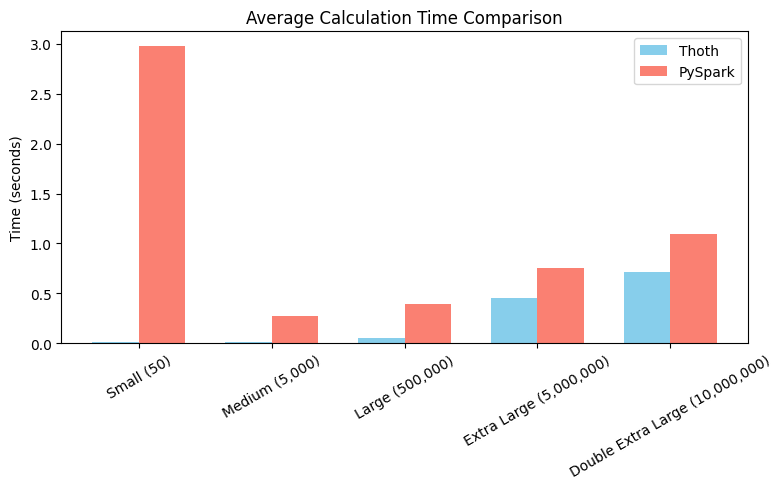

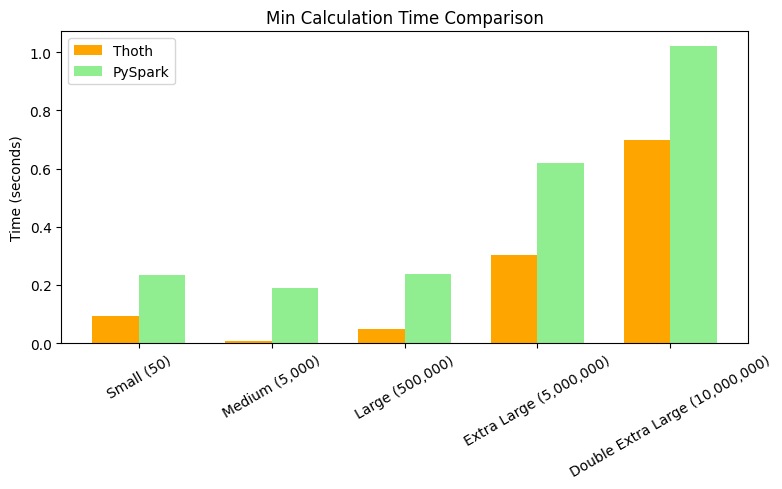

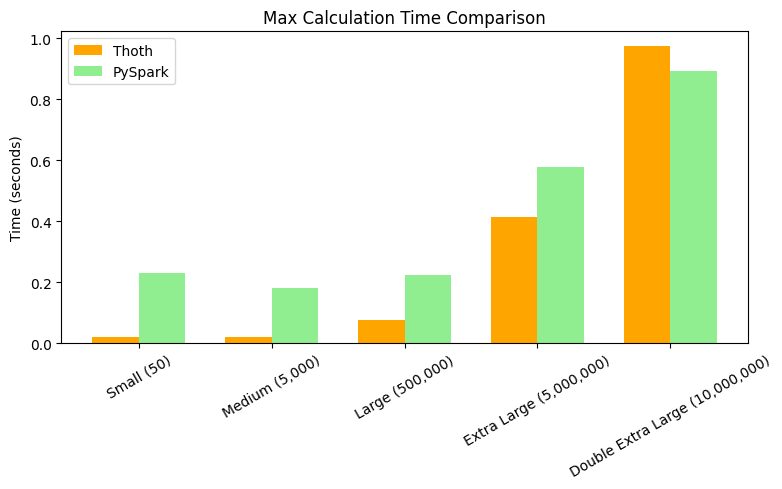

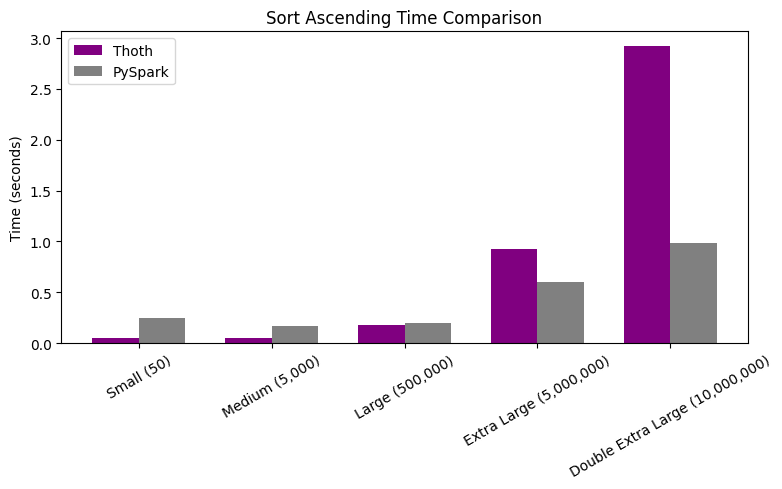

In [45]:
plot_benchmark_comparison(df_comparison, os.path.join(OUTPUT_DIR,"three_machines"))

# General Plots

In [46]:

two_machines_df = pd.read_csv(os.path.join(OUTPUT_DIR, "thoth_vs_pyspark_benchmark_two_machines.csv"))
three_machines_df = pd.read_csv(os.path.join(OUTPUT_DIR, "thoth_vs_pyspark_benchmark_three_machines.csv"))

In [47]:
two_machines_df.head()

,Dataset,Thoth Avg Time (s),PySpark Avg Time (s),Thoth Min Time (s),PySpark Min Time (s),Thoth Max Time (s),PySpark Max Time (s),Thoth Sort Asc Time (s),PySpark Sort Asc Time (s)
0,Small (50),0.012120,2.616750,0.004444,0.235788,0.003974,0.183358,0.005137,0.281627
1,"Medium (5,000)",0.004800,0.252501,0.004494,0.189337,0.004962,0.157022,0.004731,0.155365
2,"Large (500,000)",0.039693,0.377656,0.052913,0.233395,0.056058,0.230716,0.070756,0.273785
3,"Extra Large (5,000,000)",0.436107,1.126953,0.510888,0.928480,0.396677,0.995589,1.423236,0.999692
4,"Double Extra Large (10,000,000)",1.531544,1.928479,1.452846,1.527882,1.685226,1.749280,5.283168,1.691101


In [48]:
three_machines_df.head()

,Dataset,Thoth Avg Time (s),PySpark Avg Time (s),Thoth Min Time (s),PySpark Min Time (s),Thoth Max Time (s),PySpark Max Time (s),Thoth Sort Asc Time (s),PySpark Sort Asc Time (s)
0,Small (50),0.011972,2.978010,0.091844,0.234945,0.018161,0.230687,0.049360,0.250669
1,"Medium (5,000)",0.006772,0.274138,0.007037,0.190958,0.021177,0.180793,0.044777,0.168241
2,"Large (500,000)",0.050729,0.393500,0.047291,0.237813,0.074715,0.222632,0.180004,0.195553
3,"Extra Large (5,000,000)",0.451813,0.750119,0.303949,0.620849,0.413791,0.579064,0.923510,0.602916
4,"Double Extra Large (10,000,000)",0.708185,1.092081,0.698394,1.021073,0.974631,0.894587,2.920659,0.988877


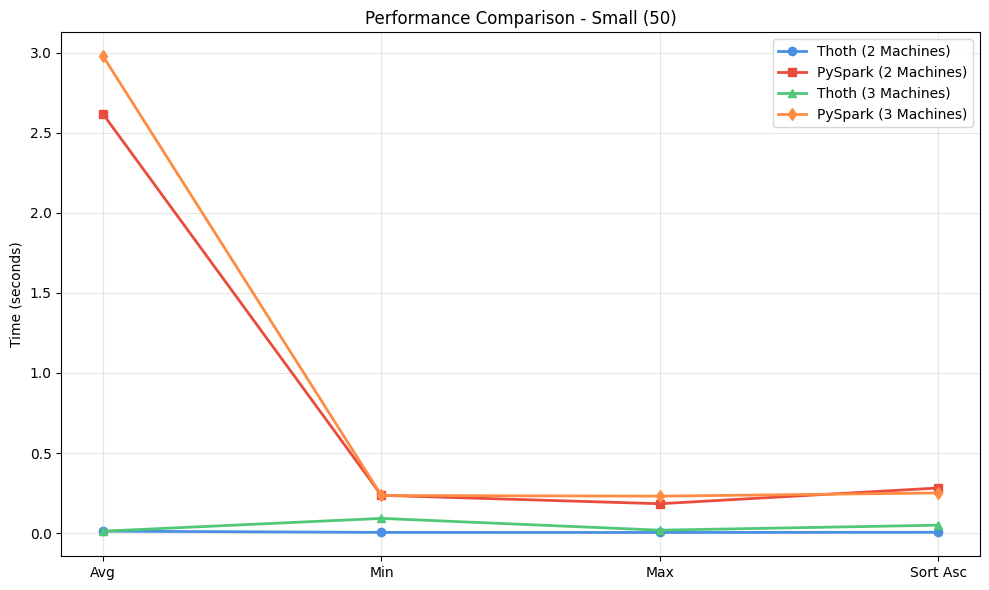

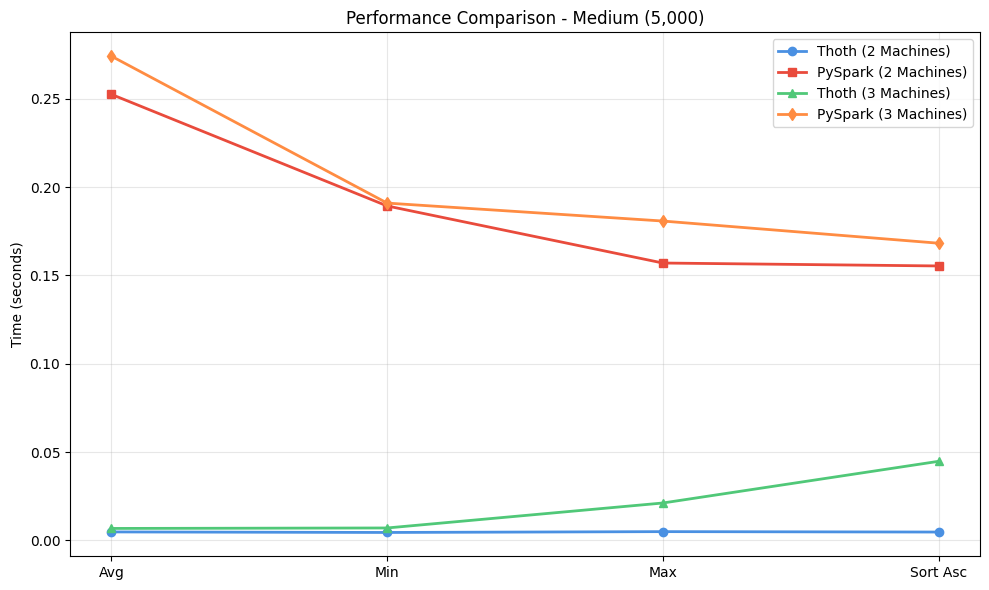

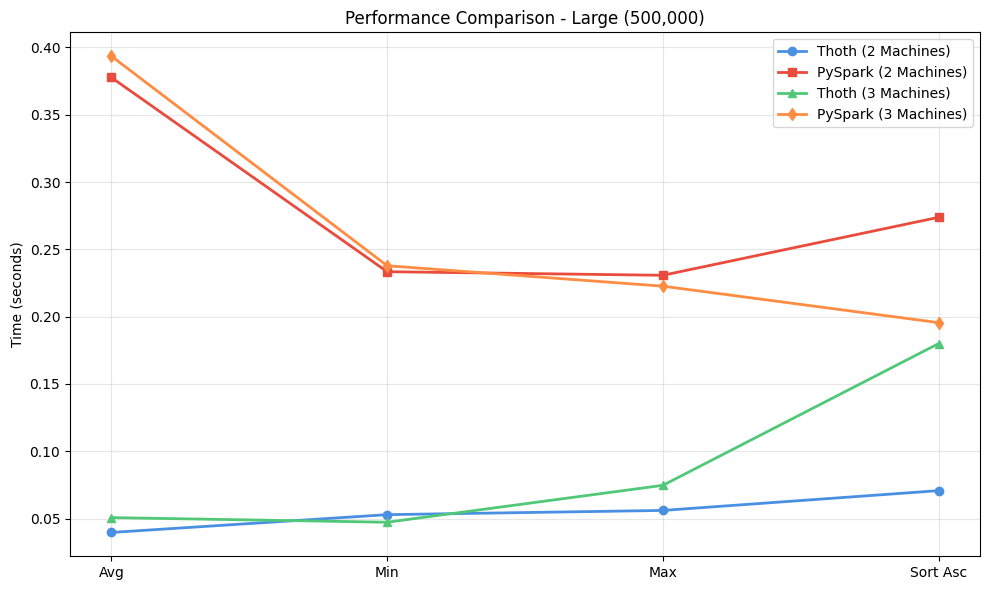

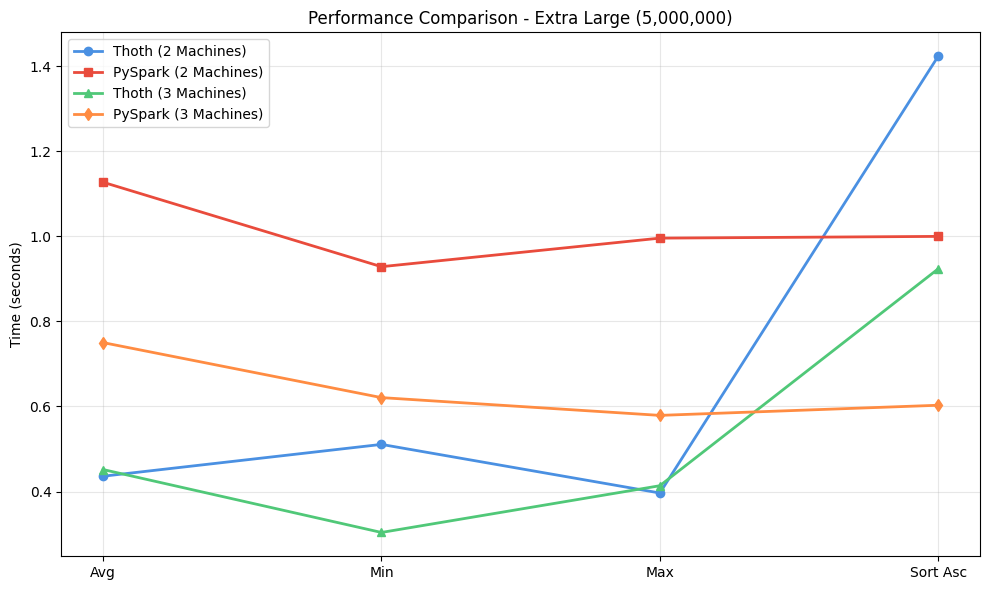

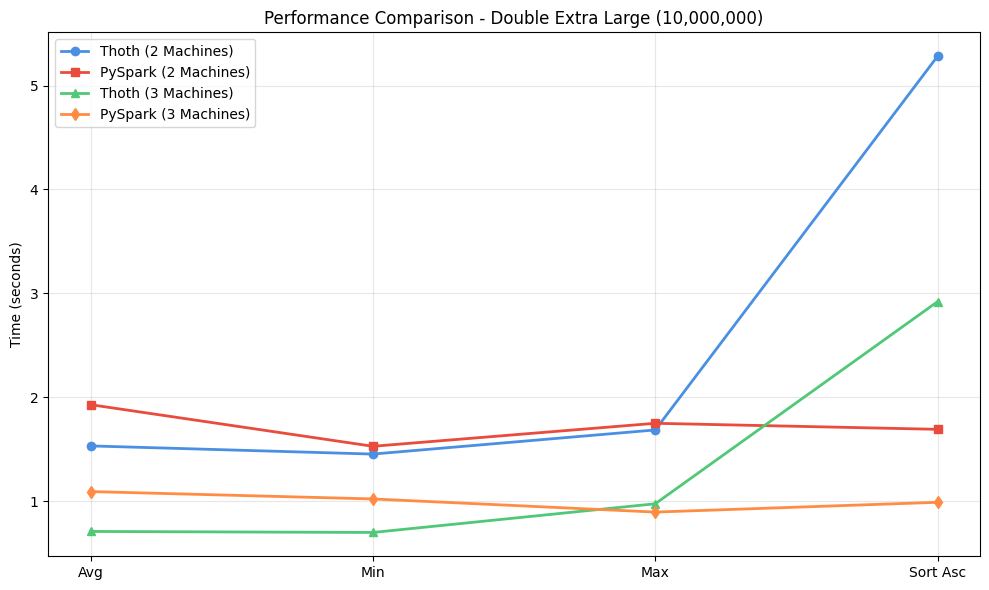

25/10/23 10:50:51 ERROR TaskSchedulerImpl: Lost executor 1 on 192.168.122.215: Worker shutting down
25/10/23 10:50:51 WARN StandaloneAppClient$ClientEndpoint: Connection to 192.168.122.217:7077 failed; waiting for master to reconnect...
25/10/23 10:50:51 WARN StandaloneSchedulerBackend: Disconnected from Spark cluster! Waiting for reconnection...
25/10/23 10:50:56 ERROR TaskSchedulerImpl: Lost executor 0 on 192.168.122.33: Remote RPC client disassociated. Likely due to containers exceeding thresholds, or network issues. Check driver logs for WARN messages.


In [49]:
def plot_combined_comparison(two_machines_df, three_machines_df, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    datasets = two_machines_df["Dataset"]
    operations = ["Avg", "Min", "Max", "Sort Asc"]
    
    for i, dataset in enumerate(datasets):
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Extract data for this dataset
        thoth_2m = [
            two_machines_df.iloc[i]["Thoth Avg Time (s)"],
            two_machines_df.iloc[i]["Thoth Min Time (s)"],
            two_machines_df.iloc[i]["Thoth Max Time (s)"],
            two_machines_df.iloc[i]["Thoth Sort Asc Time (s)"]
        ]
        
        pyspark_2m = [
            two_machines_df.iloc[i]["PySpark Avg Time (s)"],
            two_machines_df.iloc[i]["PySpark Min Time (s)"],
            two_machines_df.iloc[i]["PySpark Max Time (s)"],
            two_machines_df.iloc[i]["PySpark Sort Asc Time (s)"]
        ]
        
        thoth_3m = [
            three_machines_df.iloc[i]["Thoth Avg Time (s)"],
            three_machines_df.iloc[i]["Thoth Min Time (s)"],
            three_machines_df.iloc[i]["Thoth Max Time (s)"],
            three_machines_df.iloc[i]["Thoth Sort Asc Time (s)"]
        ]
        
        pyspark_3m = [
            three_machines_df.iloc[i]["PySpark Avg Time (s)"],
            three_machines_df.iloc[i]["PySpark Min Time (s)"],
            three_machines_df.iloc[i]["PySpark Max Time (s)"],
            three_machines_df.iloc[i]["PySpark Sort Asc Time (s)"]
        ]
        
        x = np.arange(len(operations))
        
        ax.plot(x, thoth_2m, marker='o', linewidth=2, label='Thoth (2 Machines)', color='#4A90E2')
        ax.plot(x, pyspark_2m, marker='s', linewidth=2, label='PySpark (2 Machines)', color='#E94B3C')
        ax.plot(x, thoth_3m, marker='^', linewidth=2, label='Thoth (3 Machines)', color='#50C878')
        ax.plot(x, pyspark_3m, marker='d', linewidth=2, label='PySpark (3 Machines)', color='#FF8C42')
        
        ax.set_ylabel('Time (seconds)')
        ax.set_title(f'Performance Comparison - {dataset}')
        ax.set_xticks(x)
        ax.set_xticklabels(operations)
        ax.legend()
        ax.grid(True, alpha=0.3)
        
        plt.tight_layout()
        dataset_name = dataset.split()[0].lower()
        plt.savefig(os.path.join(output_dir, f"combined_comparison_{dataset_name}.png"))
        plt.show()

plot_combined_comparison(two_machines_df, three_machines_df, os.path.join(OUTPUT_DIR, "combined"))